# import packages

In [0]:
# to handle datasets
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

# to persist the model and the scaler
import joblib

# to visualise al the columns in the dataframe
pd.pandas.set_option('display.max_columns', None)

import warnings
warnings.simplefilter(action='ignore')

In [0]:
import plotly.express as px

# load data

In [0]:
# load dataset
data = pd.read_csv('https://www.data.gouv.fr/fr/datasets/r/3004168d-bec4-44d9-a781-ef16f41856a2',sep="|")

print(data.shape)

data.head()

C:\Anaconda\lib\site-packages\IPython\core\interactiveshell.py:3063: DtypeWarning: Columns (18,23,24,26,28,29,31,33,41) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


(2535791, 43)


,Code service CH,Reference document,1 Articles CGI,2 Articles CGI,3 Articles CGI,4 Articles CGI,5 Articles CGI,No disposition,Date mutation,Nature mutation,Valeur fonciere,No voie,B/T/Q,Type de voie,Code voie,Voie,Code postal,Commune,Code departement,Code commune,Prefixe de section,Section,No plan,No Volume,1er lot,Surface Carrez du 1er lot,2eme lot,Surface Carrez du 2eme lot,3eme lot,Surface Carrez du 3eme lot,4eme lot,Surface Carrez du 4eme lot,5eme lot,Surface Carrez du 5eme lot,Nombre de lots,Code type local,Type local,Identifiant local,Surface reelle bati,Nombre pieces principales,Nature culture,Nature culture speciale,Surface terrain
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,04/01/2019,Vente,"37220,00",26.0,NaN,RUE,2730,DE MONTHOLON,1000.0,BOURG-EN-BRESSE,1,53,NaN,AI,298,NaN,8,"19,27",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,2.0,Appartement,NaN,20.0,1.0,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,04/01/2019,Vente,"185100,00",22.0,NaN,RUE,1650,GEN DELESTRAINT,1000.0,BOURG-EN-BRESSE,1,53,NaN,AM,95,NaN,137,NaN,154,"61,51",NaN,NaN,NaN,NaN,NaN,NaN,2,2.0,Appartement,NaN,62.0,3.0,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,04/01/2019,Vente,"185100,00",22.0,B,RUE,1650,GEN DELESTRAINT,1000.0,BOURG-EN-BRESSE,1,53,NaN,AM,95,NaN,7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,3.0,Dépendance,NaN,0.0,0.0,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,08/01/2019,Vente,"209000,00",3.0,NaN,RUE,0043,DES CHAMPAGNES,1160.0,PRIAY,1,314,NaN,E,1676,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,1.0,Maison,NaN,90.0,4.0,S,NaN,940.0
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,07/01/2019,Vente,"134900,00",5.0,NaN,LOT,A003,LE BIOLAY,1370.0,SAINT-ETIENNE-DU-BOIS,1,350,NaN,AA,11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,1.0,Maison,NaN,101.0,5.0,S,NaN,490.0


In [0]:
df=data.copy()

# drop empty columns

In [0]:
# let's output variables with NA and the percentage of NA
l=[]
for var in df.columns:
    if df[var].isnull().mean() > 0.5:
        l.append(var)
        print(var, df[var].isnull().mean())

Code service CH 1.0
Reference document 1.0
1 Articles CGI 1.0
2 Articles CGI 1.0
3 Articles CGI 1.0
4 Articles CGI 1.0
5 Articles CGI 1.0
B/T/Q 0.9568462069626401
Prefixe de section 0.949982076598584
No Volume 0.9973870086296545
1er lot 0.691370858245021
Surface Carrez du 1er lot 0.9128220740589426
2eme lot 0.9356894949149989
Surface Carrez du 2eme lot 0.9785968165357476
3eme lot 0.9897144520191136
Surface Carrez du 3eme lot 0.9979438368540625
4eme lot 0.9963577439938859
Surface Carrez du 4eme lot 0.9994419887127922
5eme lot 0.9982541936618593
Surface Carrez du 5eme lot 0.999759838251654
Identifiant local 1.0
Nature culture speciale 0.9554959379538771


In [0]:
df=df.drop(l,axis=1)
df.head()

,No disposition,Date mutation,Nature mutation,Valeur fonciere,No voie,Type de voie,Code voie,Voie,Code postal,Commune,Code departement,Code commune,Section,No plan,Nombre de lots,Code type local,Type local,Surface reelle bati,Nombre pieces principales,Nature culture,Surface terrain
0,1,04/01/2019,Vente,"37220,00",26.0,RUE,2730,DE MONTHOLON,1000.0,BOURG-EN-BRESSE,1,53,AI,298,1,2.0,Appartement,20.0,1.0,NaN,NaN
1,1,04/01/2019,Vente,"185100,00",22.0,RUE,1650,GEN DELESTRAINT,1000.0,BOURG-EN-BRESSE,1,53,AM,95,2,2.0,Appartement,62.0,3.0,NaN,NaN
2,1,04/01/2019,Vente,"185100,00",22.0,RUE,1650,GEN DELESTRAINT,1000.0,BOURG-EN-BRESSE,1,53,AM,95,1,3.0,Dépendance,0.0,0.0,NaN,NaN
3,1,08/01/2019,Vente,"209000,00",3.0,RUE,0043,DES CHAMPAGNES,1160.0,PRIAY,1,314,E,1676,0,1.0,Maison,90.0,4.0,S,940.0
4,1,07/01/2019,Vente,"134900,00",5.0,LOT,A003,LE BIOLAY,1370.0,SAINT-ETIENNE-DU-BOIS,1,350,AA,11,0,1.0,Maison,101.0,5.0,S,490.0


In [0]:
df.shape

(2535791, 21)

## convert types

In [0]:
df.dtypes

No disposition                 int64
Date mutation                 object
Nature mutation               object
Valeur fonciere               object
No voie                      float64
Type de voie                  object
Code voie                     object
Voie                          object
Code postal                  float64
Commune                       object
Code departement              object
Code commune                   int64
Section                       object
No plan                        int64
Nombre de lots                 int64
Code type local              float64
Type local                    object
Surface reelle bati          float64
Nombre pieces principales    float64
Nature culture                object
Surface terrain              float64
dtype: object

In [0]:
df['Date mutation']=pd.to_datetime(df['Date mutation'],format='%d/%m/%Y')

In [0]:
df['Valeur fonciere']= df['Valeur fonciere'].str.replace(',', '.').astype(float)

In [0]:
df['Code postal'] = df['Code postal'].astype(str)
df['Code departement'] = df['Code departement'].astype(str)
df['Code commune'] = df['Code commune'].astype(str)

In [0]:
df['Nature culture'].unique()

array([nan, 'S', 'L', 'AB', 'T', 'J', 'P', 'AG', 'BT', 'BP', 'VI', 'BF',
       'BS', 'PA', 'CH', 'BR', 'E', 'VE', 'CA', 'BM', 'B', 'PP', 'PC',
       'TP', 'BO', 'LB', 'PH', 'PE'], dtype=object)

In [0]:
mixed='Code voie'

In [0]:
df['Jour mutation'] = df['Date mutation'].dt.day

In [0]:
df['Mois mutation'] = df['Date mutation'].dt.month

## drop duplicates

In [0]:
df=df.drop_duplicates()

# DATA ANALYSIS

## missing values

In [0]:
# make a list of the variables that contain missing values
vars_with_na = [var for var in df.columns if df[var].isnull().sum() > 0]

# determine percentage of missing values
df[vars_with_na].isnull().mean()

Valeur fonciere              0.011539
No voie                      0.404465
Type de voie                 0.415539
Code voie                    0.011116
Voie                         0.011182
Code postal                  0.011169
Section                      0.000029
Code type local              0.466308
Type local                   0.466308
Surface reelle bati          0.466985
Nombre pieces principales    0.466985
Nature culture               0.312706
Surface terrain              0.312706
dtype: float64

#### Relationship between values being missing and Sale Price

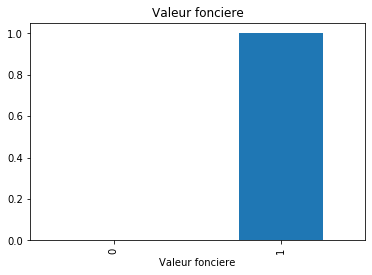

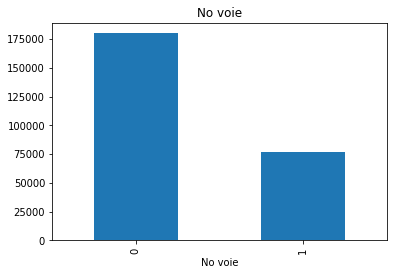

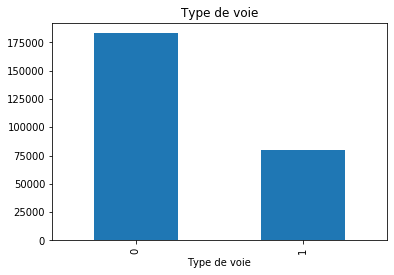

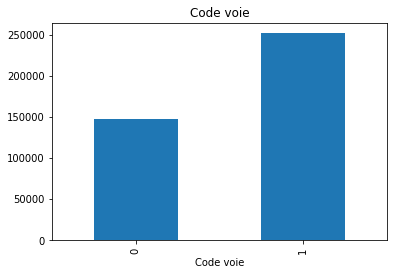

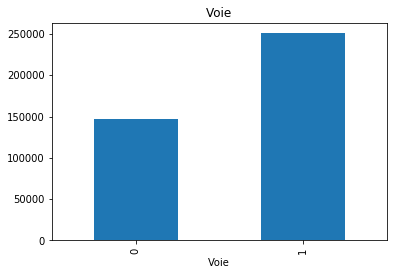

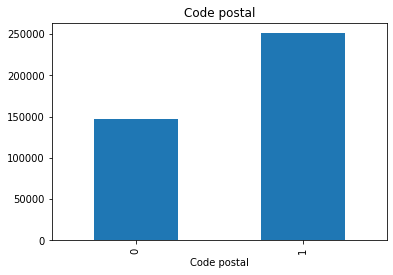

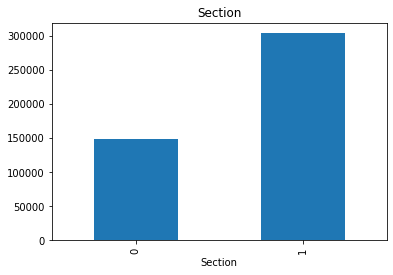

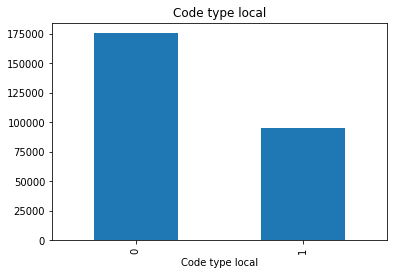

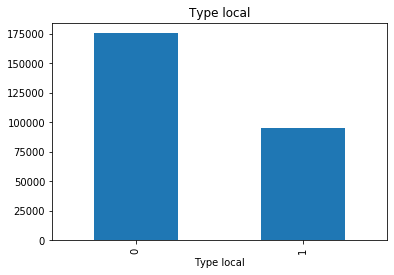

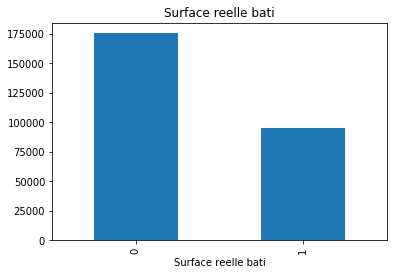

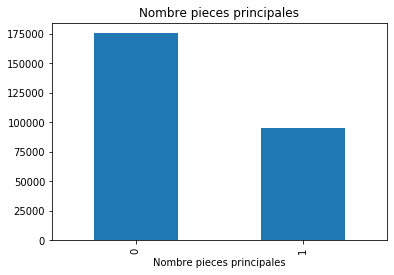

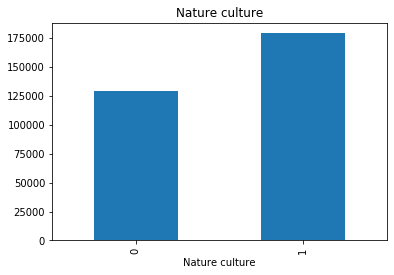

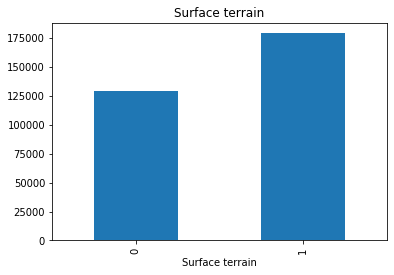

In [0]:
def analyse_na_value(df, var):

    df = df.copy()

    # let's make a variable that indicates 1 if the observation was missing or zero otherwise
    df[var] = np.where(df[var].isnull(), 1, 0)

    # let's compare the median SalePrice in the observations where data is missing
    # vs the observations where a value is available

    df.groupby(var)['Valeur fonciere'].median().plot.bar()

    plt.title(var)
    plt.show()


# let's run the function on each variable with missing data
for var in vars_with_na:
    analyse_na_value(df, var)

### Numerical variables

In [0]:
# make list of numerical variables
num_vars = [var for var in df.columns if df[var].dtypes != 'O' and var!='Date mutation']

print('Number of numerical variables: ', len(num_vars))

# visualise the numerical variables
df[num_vars].head()

Number of numerical variables:  13


,No disposition,Valeur fonciere,No voie,Code postal,Code commune,No plan,Nombre de lots,Code type local,Surface reelle bati,Nombre pieces principales,Surface terrain,Jour mutation,Mois mutation
0,1,37220.0,26.0,1000.0,53,298,1,2.0,20.0,1.0,NaN,4,1
1,1,185100.0,22.0,1000.0,53,95,2,2.0,62.0,3.0,NaN,4,1
2,1,185100.0,22.0,1000.0,53,95,1,3.0,0.0,0.0,NaN,4,1
3,1,209000.0,3.0,1160.0,314,1676,0,1.0,90.0,4.0,940.0,8,1
4,1,134900.0,5.0,1370.0,350,11,0,1.0,101.0,5.0,490.0,7,1


### Change in House price during 2019

Text(0.5, 1.0, 'Change in House price during 2019')

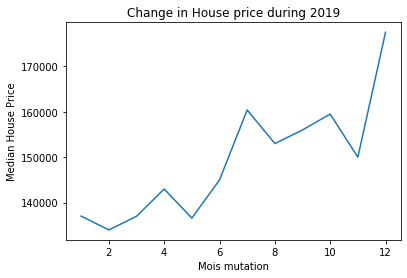

In [0]:
df.groupby('Mois mutation')['Valeur fonciere'].median().plot()
plt.ylabel('Median House Price')
plt.title('Change in House price during 2019')

### relationship between the month of sale and the price 

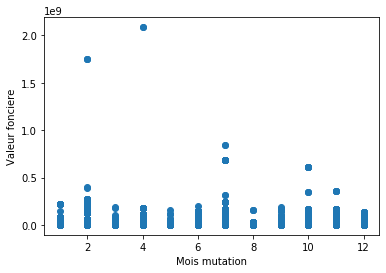

In [0]:
nbr_jours=df['Date mutation']-
plt.scatter(df['Mois mutation'], df['Valeur fonciere'])
plt.ylabel('Valeur fonciere')
plt.xlabel('Mois mutation')
plt.show()

### temporal variables

In [0]:
### temporal variables
year_vars=['Mois mutation','Jour mutation','Date mutation']

#### Discrete variables

In [0]:
#  let's male a list of discrete variables
discrete_vars = [var for var in num_vars if len(
    df[var].unique()) < 20 ]


print('Number of discrete variables: ', len(discrete_vars))

Number of discrete variables:  2


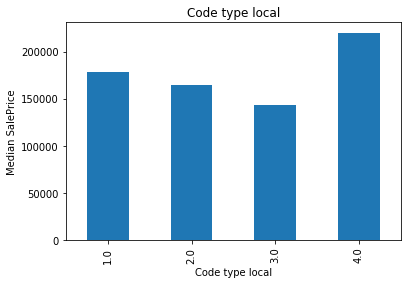

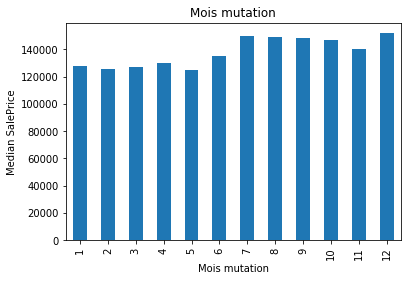

In [0]:
def analyse_discrete(df, var):
    df = df.copy()
    df.groupby(var)['Valeur fonciere'].median().plot.bar()
    plt.title(var)
    plt.ylabel('Median SalePrice')
    plt.show()
    
for var in discrete_vars:
    analyse_discrete(df, var)

### Continuous variables

In [0]:
# make list of continuous variables
cont_vars = [
    var for var in num_vars if var not in discrete_vars+year_vars]

print('Number of continuous variables: ', len(cont_vars))

Number of continuous variables:  10


In [0]:
# let's visualise the continuous variables

df[cont_vars].head()

,No disposition,Valeur fonciere,No voie,Code postal,Code commune,No plan,Nombre de lots,Surface reelle bati,Nombre pieces principales,Surface terrain
0,1,37220.0,26.0,1000.0,53,298,1,20.0,1.0,NaN
1,1,185100.0,22.0,1000.0,53,95,2,62.0,3.0,NaN
2,1,185100.0,22.0,1000.0,53,95,1,0.0,0.0,NaN
3,1,209000.0,3.0,1160.0,314,1676,0,90.0,4.0,940.0
4,1,134900.0,5.0,1370.0,350,11,0,101.0,5.0,490.0


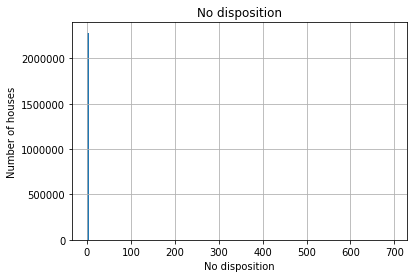

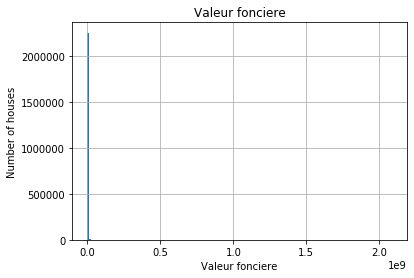

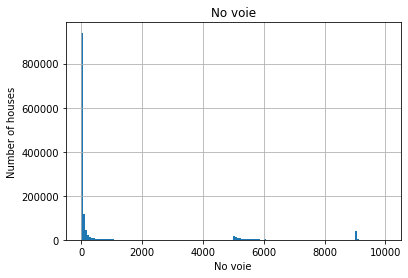

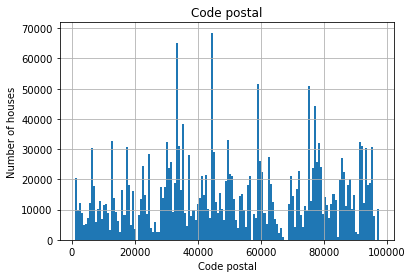

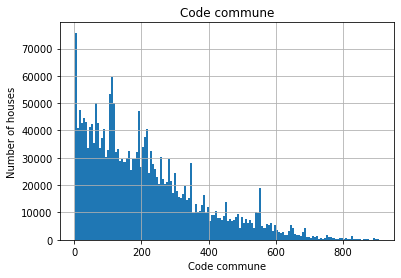

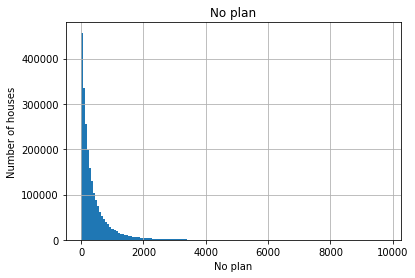

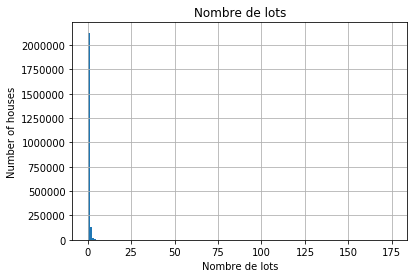

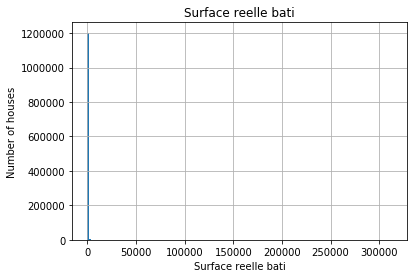

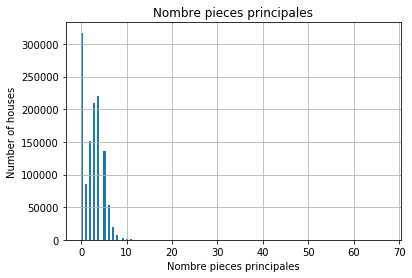

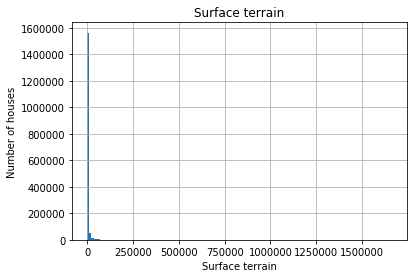

In [0]:
# Let's go ahead and analyse the distributions of these variables


def analyse_continuous(df, var):
    df = df.copy()
    df[var].hist(bins=150)
    plt.ylabel('Number of houses')
    plt.xlabel(var)
    plt.title(var)
    plt.show()


for var in cont_vars:
    analyse_continuous(df, var)

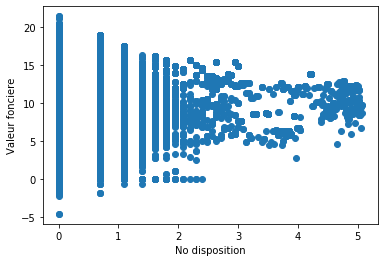

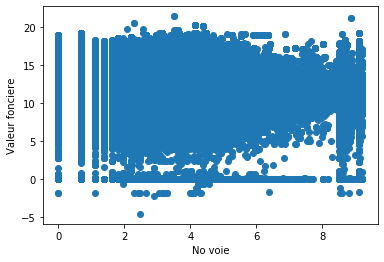

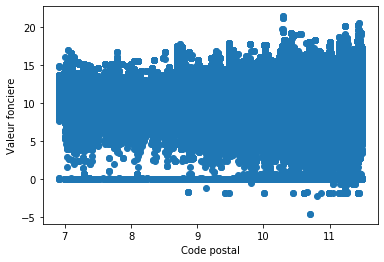

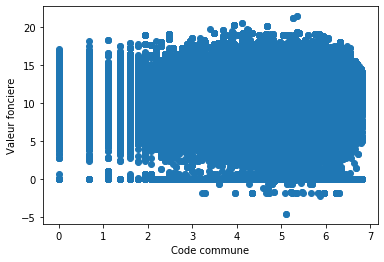

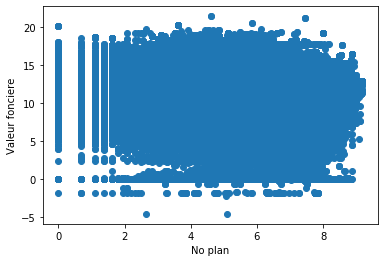

In [0]:
# let's explore the relationship between the house price and
# the transformed variables with more detail:


def transform_analyse_continuous(df, var):
    df = df.copy()

    # log does not take negative values, so let's be careful and skip those variables
    if any(data[var] <= 0):
        pass
    else:
        # log transform the variable
        df[var] = np.log(df[var])
        
        # log transform the target (remember it was also skewed)
        df['Valeur fonciere'] = np.log(df['Valeur fonciere'])
        
        # plot
        plt.scatter(df[var], df['Valeur fonciere'])
        plt.ylabel('Valeur fonciere')
        plt.xlabel(var)
        plt.show()


for var in cont_vars:
    if var != 'Valeur fonciere':
        transform_analyse_continuous(df, var)

In [0]:
df.to_csv('data.csv')